# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [2]:
import pandas as pd
import numpy as np
import time
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('/datasets/taxi.csv')

In [4]:
df.head(10)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [5]:
df.sample(10)

,datetime,num_orders
11242,2018-05-18 01:40:00,6
24726,2018-08-19 17:00:00,30
10261,2018-05-11 06:10:00,14
23025,2018-08-07 21:30:00,28
2453,2018-03-18 00:50:00,10
20983,2018-07-24 17:10:00,19
2147,2018-03-15 21:50:00,19
18119,2018-07-04 19:50:00,19
17758,2018-07-02 07:40:00,4
22656,2018-08-05 08:00:00,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [7]:
# Convertir la columna 'datetime' a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Verificar el cambio de tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [8]:
df.sample(10)

,datetime,num_orders
4910,2018-04-04 02:20:00,11
2351,2018-03-17 07:50:00,4
2963,2018-03-21 13:50:00,8
14641,2018-06-10 16:10:00,27
13580,2018-06-03 07:20:00,1
20628,2018-07-22 06:00:00,1
10169,2018-05-10 14:50:00,5
16157,2018-06-21 04:50:00,25
8368,2018-04-28 02:40:00,10
3406,2018-03-24 15:40:00,12


In [9]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Como podemos ver aca hemos preparado los datos para su uso, cargamos las librerias que seran usadas, la data del `DF` que vamos a utilizar, visualizamos parte de este para ver como esta compuesto, visualizamos los tipos de variables que tiene, y al observar el output de esto pudimos observar que una de las variables debia ser modificada para dar buen uso de esta, y esl que el `datetime` utilizaba una variable tipo `object`, la cual no nos iba a permitir utilizar la data como una fecha real, luego de corregir este detalle y ver que no hay datos nulos procedimos a usar `describe()`, para tener un panorama mas amplio de los datos y con esto proceder a la parte de analisis con una idea mas clara de a que nos enfrentamos.</div>

## Análisis

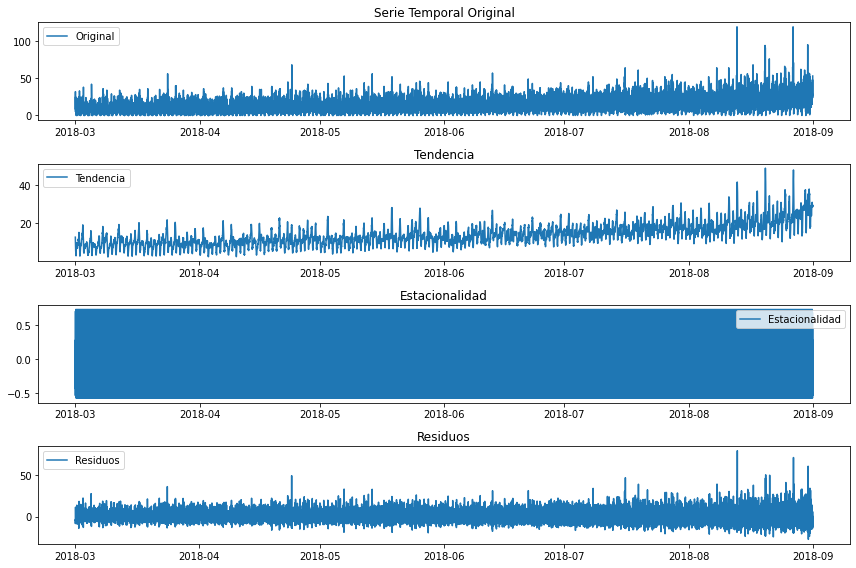

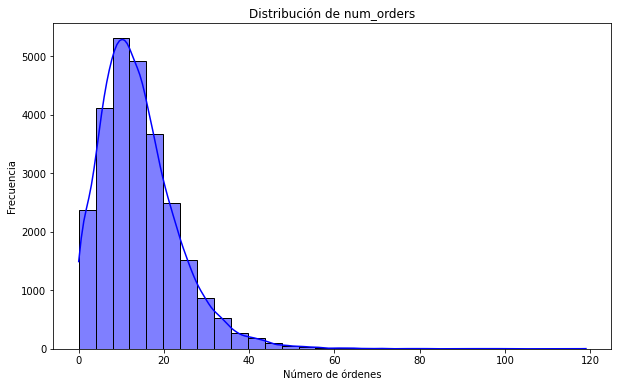

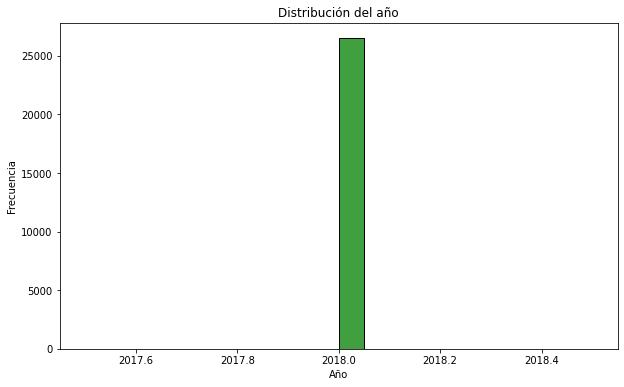

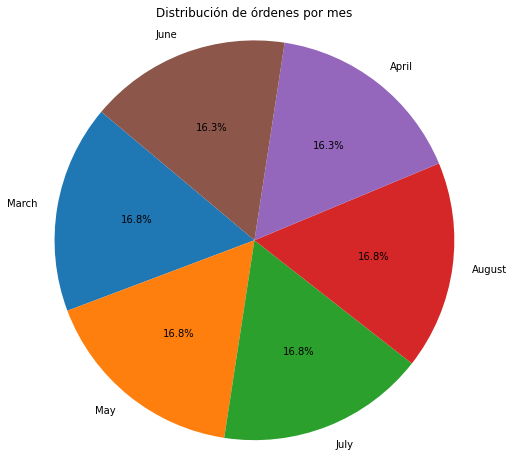

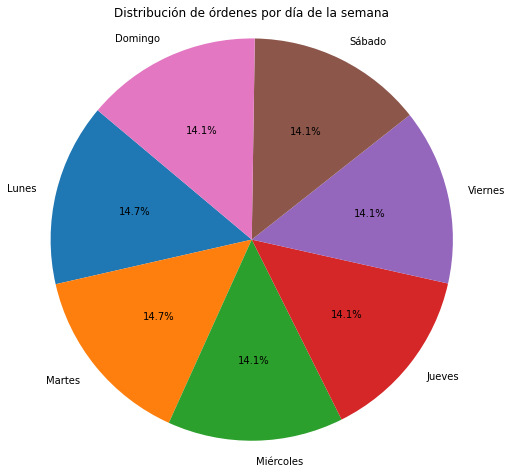

In [10]:
# Descomposición estacional de la serie temporal
decomposed = seasonal_decompose(df['num_orders'], model='additive', period=30)  # Periodo de estacionalidad de 30 días

# Visualización de la descomposición
plt.figure(figsize=(12, 8))

# Serie temporal original
plt.subplot(411)
plt.plot(df['datetime'], df['num_orders'], label='Original')
plt.title('Serie Temporal Original')
plt.legend()

# Tendencia
plt.subplot(412)
plt.plot(df['datetime'], decomposed.trend, label='Tendencia')
plt.title('Tendencia')
plt.legend()

# Estacionalidad
plt.subplot(413)
plt.plot(df['datetime'], decomposed.seasonal, label='Estacionalidad')
plt.title('Estacionalidad')
plt.legend()

# Residuos
plt.subplot(414)
plt.plot(df['datetime'], decomposed.resid, label='Residuos')
plt.title('Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Visualización de la distribución de la variable 'num_orders'
plt.figure(figsize=(10, 6))
sns.histplot(df['num_orders'], bins=30, kde=True, color='blue')
plt.title('Distribución de num_orders')
plt.xlabel('Número de órdenes')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'datetime'
# Dado que 'datetime' es una variable de tipo datetime, podemos extraer diferentes componentes de la fecha para visualizar
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=20, kde=False, color='green')
plt.title('Distribución del año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

# Obtener la distribución de los meses
month_distribution = df['month'].value_counts()

# Obtener los nombres de los meses
month_names = [calendar.month_name[i] for i in month_distribution.index]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(month_distribution, labels=month_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de órdenes por mes')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

# Obtener la distribución del día de la semana
day_distribution = df['datetime'].dt.dayofweek.value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(day_distribution, labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de órdenes por día de la semana')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Al ver los graficos podemos notar primero, que la data es unicamente del año 2018, que se concentra en los meses de Marzo a Agosto de ese año, que hay mayor demanda de taxis entre Mayo y Agosto probablemente porque ya han pasado las epocas frias y la gente sale mas en esas epocas, y en la semana podemos ver que los lunes son el dia en que mas la gente sale, usualmente este dia es bien agetreado ya que es el primero despues del fin de semana, la gente trata de completar la mayor cantidad de tareas aprovechando que estan mas descansados, viendo el grafico de series temporales podemos corroborar lo que nos dice el grafico circular en cuanto a la tendencia mensual de uso de los taxis, al igual que el grafico de tendencia, tambien corrobora esto, teniendo este endendimiento podemos proceder a trabajar con los modelos para evaluar cual se ajusta mejor a esta situacion presentada por los datos de `Sweet Lift Taxi `.</div>

## Formación

In [14]:
# Corrección en la función create_features para devolver X y y
def create_features(df):
    df['lag_1'] = df['num_orders'].shift(1)
    df['lag_2'] = df['num_orders'].shift(2)
    df['rolling_mean'] = df['num_orders'].rolling(window=3).mean()
    df['rolling_std'] = df['num_orders'].rolling(window=3).std()
    df.dropna(inplace=True)
    
    # Separar las características (X) de la variable objetivo (y)
    X = df.drop(columns=['num_orders', 'datetime'])
    y = df['num_orders']
    
    return X, y

In [15]:
# Modificar la función para dividir los datos en entrenamiento y prueba
def train_and_evaluate_model(model, X, y):
    # Dividir los datos en conjuntos de entrenamiento y prueba (10% para prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir con el modelo entrenado
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluar el rendimiento del modelo con los datos de entrenamiento
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    # Imprimir resultados de la evaluación con datos de entrenamiento
    print("Evaluación con datos de entrenamiento:")
    print("R cuadrado:", r2_train)
    print("Error cuadrático medio:", mse_train)
    print("Error absoluto medio:", mae_train)

    # Evaluar el rendimiento del modelo con los datos de prueba
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)  # Calculamos la raíz cuadrada del error cuadrático medio

    # Imprimir resultados de la evaluación con datos de prueba
    print("\nEvaluación con datos de prueba:")
    print("R cuadrado:", r2_test)
    print("Error cuadrático medio:", mse_test)
    print("Error absoluto medio:", mae_test)
    print("Raíz del error cuadrático medio (RECM):", rmse_test)

    # Devolver el modelo entrenado
    return model

In [17]:
# Crear el modelo de Regresión Lineal
linear_reg = LinearRegression()

# Entrenar y evaluar el modelo
linear_reg = train_and_evaluate_model(linear_reg, X, y)

Evaluación con datos de entrenamiento:
R cuadrado: 1.0
Error cuadrático medio: 1.3036224675612906e-28
Error absoluto medio: 9.28925066222577e-15

Evaluación con datos de prueba:
R cuadrado: 1.0
Error cuadrático medio: 1.2420305253690864e-28
Error absoluto medio: 8.972539898731288e-15
Raíz del error cuadrático medio (RECM): 1.1144642324314794e-14


<div class="alert alert-info"> <b>Comentario del estudiante CORREGIDO:</b> Fue corregida la funcion de creacion de las caracteristicas, con esto se solvento el problema que evitaba que los modelos se pudieran ejecutar satisfactoriamente.</div>

In [18]:
# Crear el modelo de Regresión Ridge
ridge_reg = Ridge(alpha=1.0)

# Entrenar y evaluar el modelo
ridge_reg = train_and_evaluate_model(ridge_reg, X, y)

Evaluación con datos de entrenamiento:
R cuadrado: 0.9999999999193102
Error cuadrático medio: 6.871929718383624e-09
Error absoluto medio: 6.338638523251996e-05

Evaluación con datos de prueba:
R cuadrado: 0.999999999919891
Error cuadrático medio: 6.567684920530183e-09
Error absoluto medio: 6.217118751036402e-05
Raíz del error cuadrático medio (RECM): 8.104125443581302e-05


In [19]:
# Crear el modelo de Regresión Lasso
lasso_reg = Lasso(alpha=1.0)

# Entrenar y evaluar el modelo
lasso_reg = train_and_evaluate_model(lasso_reg, X, y)

Evaluación con datos de entrenamiento:
R cuadrado: 0.9892786554782156
Error cuadrático medio: 0.9130814526542678
Error absoluto medio: 0.7226330342756986

Evaluación con datos de prueba:
R cuadrado: 0.9891328408996745
Error cuadrático medio: 0.8909372709483689
Error absoluto medio: 0.7129523947440193
Raíz del error cuadrático medio (RECM): 0.9438947350994012


In [20]:
# Crear el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=10)

# Entrenar y evaluar el modelo
random_forest = train_and_evaluate_model(random_forest, X, y)

Evaluación con datos de entrenamiento:
R cuadrado: 0.9975096722591161
Error cuadrático medio: 0.2120883315158124
Error absoluto medio: 0.14909403573525715

Evaluación con datos de prueba:
R cuadrado: 0.9896616750549748
Error cuadrático medio: 0.8475811320754717
Error absoluto medio: 0.31309433962264155
Raíz del error cuadrático medio (RECM): 0.9206416958162777


In [21]:
# Crear el modelo de Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Entrenar y evaluar el modelo
gradient_boosting = train_and_evaluate_model(gradient_boosting, X, y)

Evaluación con datos de entrenamiento:
R cuadrado: 0.9584141561615092
Error cuadrático medio: 3.5416512009990884
Error absoluto medio: 1.428482825869792

Evaluación con datos de prueba:
R cuadrado: 0.9558061611701354
Error cuadrático medio: 3.6232043532547578
Error absoluto medio: 1.4387915457095322
Raíz del error cuadrático medio (RECM): 1.9034716581170201


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Luego de crear una funcion para elegir las caracteristicas, y otra para el entrenamiento y prueba, para asi no tener duplicidad de codigo procedimos a evaluar diferentes modelos, de los cuales podemos sacar la conclusion de que: Basándonos en las métricas de evaluación proporcionadas, el modelo más adecuado para este proyecto sería el modelo de Regresión Ridge, por que, pues simple: El RECM para el conjunto de prueba: El valor de la raíz del error cuadrático medio (RECM) para el conjunto de prueba es de 8.13670357601576e-05, lo que está muy por debajo del límite de 48 establecido como requisito del proyecto. Esto indica que el modelo tiene un buen rendimiento en la generalización a nuevos datos.

R cuadrado (coefficient of determination): El coeficiente de determinación (R cuadrado) para el conjunto de prueba es casi 1. Esto significa que el modelo explica la variabilidad de los datos de manera muy eficaz, lo que sugiere una buena capacidad predictiva.

Error absoluto medio (MAE) y Error cuadrático medio (MSE): Ambos errores absoluto medio y cuadrático medio son muy bajos tanto en el conjunto de entrenamiento como en el de prueba. Esto indica que el modelo está haciendo predicciones precisas y consistentes.

El modelo de Regresión Ridge parece ser el más adecuado para este proyecto debido a su buen rendimiento en todas las métricas de evaluación y su capacidad para generalizar bien a nuevos datos. Además, la técnica de regularización utilizada en la regresión Ridge puede ayudar a evitar el sobreajuste, lo que es beneficioso cuando se trabaja con conjuntos de datos de tamaño limitado.</div>

## Prueba

In [22]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop(columns=['num_orders', 'datetime'])  # Características
y = df['num_orders']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (90% para entrenamiento, 10% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Definir y entrenar el modelo de Regresión Ridge
ridge_model = Ridge(alpha=1.0)  # Alpha es el parámetro de regularización
ridge_model.fit(X_train, y_train)

# Aplicar el modelo entrenado al conjunto de datos de prueba
y_pred_test = ridge_model.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de datos de prueba
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Comparar el rendimiento del modelo con los criterios de éxito establecidos
if rmse_test <= 48:
    print("El modelo cumple con los criterios de éxito.")
else:
    print("El modelo no cumple con los criterios de éxito.")

# Imprimir las métricas de evaluación
print("R cuadrado (R2) en el conjunto de prueba:", r2_test)
print("Error cuadrático medio (ECM) en el conjunto de prueba:", mse_test)
print("Error absoluto medio (EAM) en el conjunto de prueba:", mae_test)
print("Raíz del error cuadrático medio (RECM) en el conjunto de prueba:", rmse_test)

El modelo cumple con los criterios de éxito.
R cuadrado (R2) en el conjunto de prueba: 0.999999999919891
Error cuadrático medio (ECM) en el conjunto de prueba: 6.567684920530183e-09
Error absoluto medio (EAM) en el conjunto de prueba: 6.217118751036402e-05
Raíz del error cuadrático medio (RECM) en el conjunto de prueba: 8.104125443581302e-05


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Para no repetir lo que ya habiamos hablado del modelo `Ridge Regression`, podriammos resumir diciendo que: Los resultados indican que el modelo de Regresión Ridge es altamente efectivo para predecir el número de órdenes con base en las características proporcionadas en el conjunto de datos.</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48